# Supervised Learning - Regression
In this notebook we will learn about regression task and how these models can be affected during their learning phase. Let's start by importing the libraries we required for the expriments.

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import math
import prettytable as pt
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import normalize,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
from sklearn.pipeline import make_pipeline

In [ ]:
np.random.seed(1)
x = np.random.uniform(0,1,20)
N = np.random.normal(loc=0,scale=0.2,size=20)
print(x)
print(N)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
 2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01
 4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01]
[ 0.22675389 -0.21997825 -0.03448564 -0.17557168  0.00844275  0.11656304
 -0.22012384  0.22894474  0.18031814  0.10049887  0.18017119 -0.13674557
 -0.02457805 -0.18715389 -0.05357762  0.10607109 -0.13833215 -0.07935071
 -0.13743454 -0.16904113]


In [ ]:
y = 2*math.pi*x
for i in range(20):
    y[i] = math.sin(y[i])+ N[i]
print(y)


[ 0.72481911 -1.20264551 -0.033767    0.77085391  0.80531149  0.66473795
  0.70074666  1.05403988  0.78441262 -0.14098311  0.66635368 -1.05504706
  0.93474977 -0.88027551  0.11765569 -0.77164693  0.35819149 -0.4398089
  0.63462613  0.77826164]


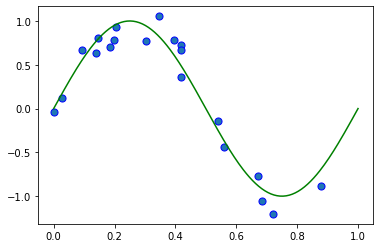

In [ ]:
x_s = np.linspace(0,1,200)
y_s = 2*math.pi*x_s
for i in range(200):
    y_s[i] = math.sin(y_s[i])
plt.scatter(x, y, marker='o', edgecolors='b', s=50)
plt.plot(x_s, y_s, "g-")

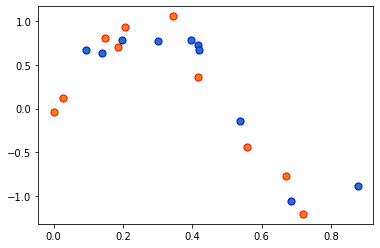

In [ ]:
X_train,X_test, Y_train, Y_test =model_selection.train_test_split(x, y, test_size=0.5, random_state=3)
plt.scatter(X_train, Y_train, marker='o', edgecolors='b', s=50)
plt.scatter(X_test, Y_test, marker='o', edgecolors='r', s=50)

In [ ]:
def polynomial(i:int) :
    poly = PolynomialFeatures(degree = i)
    model = make_pipeline(StandardScaler(), poly, Ridge(alpha=0, fit_intercept=True, solver='svd'))
    model.fit(X_train[:, np.newaxis], Y_train)
    return poly, model

train_error = [0]*10
test_error = [0]*10
def getTraninErrorAndTestError(i:int,  model) :
    rmse_train = model.predict(X_train[:, np.newaxis])
    rmse_test = model.predict(X_test[:, np.newaxis])
    train_error[i] = math.sqrt(mean_squared_error(Y_train, rmse_train))
    test_error[i] = math.sqrt(mean_squared_error(Y_test, rmse_test))

In [ ]:
weights = {}
orders = [0, 1, 3, 5, 7, 9]
for j in orders :
    tmp = [""]*10
    poly, model = polynomial(j)
    weight = [model.steps[2][1].intercept_.tolist()]
    weight.extend(model.steps[2][1].coef_[1:].tolist())
    for i in range(len(weight)) :
        tmp[i] = round(weight[i],2)
    weights[str(j)] = tmp
weights

{'0': [0.29, '', '', '', '', '', '', '', '', ''],
 '1': [0.29, -0.58, '', '', '', '', '', '', '', ''],
 '3': [0.59, -1.1, -0.47, 0.31, '', '', '', '', '', ''],
 '5': [0.7, -0.9, -1.05, 0.21, 0.28, -0.06, '', '', '', ''],
 '7': [0.73, -0.4, -1.39, -1.79, 0.31, 1.62, 0.13, -0.36, '', ''],
 '9': [0.86,
  -0.47,
  -53.79,
  -96.89,
  210.69,
  373.52,
  -126.23,
  -299.84,
  3.65,
  59.92]}

In [ ]:
tb= PrettyTable()
tb.add_column("", ["w0","w1","w2","w3","w4","w5","w6","w7","w8","w9"])
tb.add_column("M = 0", weights["0"])
tb.add_column("M = 1", weights["1"])
tb.add_column("M = 3", weights["3"])
tb.add_column("M = 5", weights["5"])
tb.add_column("M = 7", weights["7"])
tb.add_column("M = 9", weights["9"])
print(tb)

+----+-------+-------+-------+-------+-------+---------+
|    | M = 0 | M = 1 | M = 3 | M = 5 | M = 7 |  M = 9  |
+----+-------+-------+-------+-------+-------+---------+
| w0 |  0.29 |  0.29 |  0.59 |  0.7  |  0.73 |   0.86  |
| w1 |       | -0.58 |  -1.1 |  -0.9 |  -0.4 |  -0.47  |
| w2 |       |       | -0.47 | -1.05 | -1.39 |  -53.79 |
| w3 |       |       |  0.31 |  0.21 | -1.79 |  -96.89 |
| w4 |       |       |       |  0.28 |  0.31 |  210.69 |
| w5 |       |       |       | -0.06 |  1.62 |  373.52 |
| w6 |       |       |       |       |  0.13 | -126.23 |
| w7 |       |       |       |       | -0.36 | -299.84 |
| w8 |       |       |       |       |       |   3.65  |
| w9 |       |       |       |       |       |  59.92  |
+----+-------+-------+-------+-------+-------+---------+


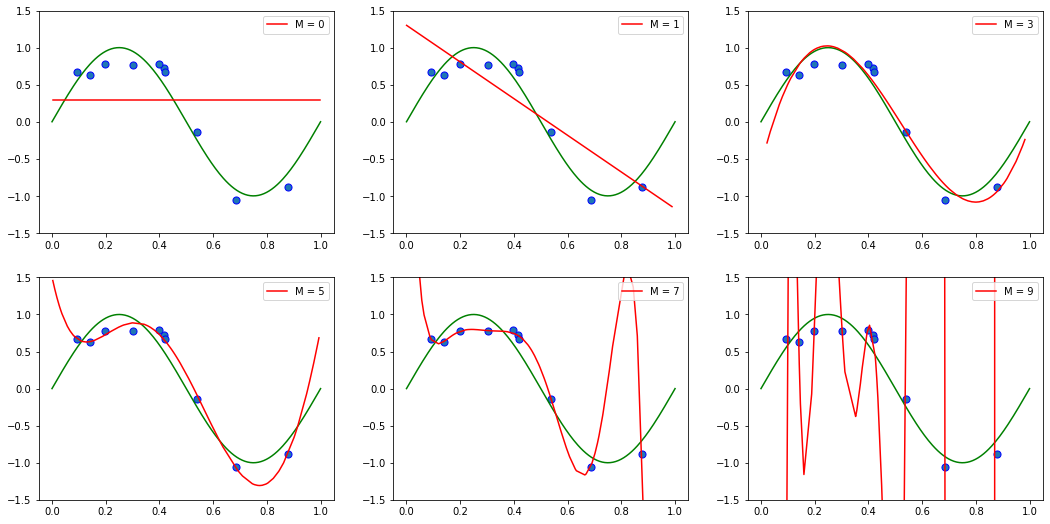

In [ ]:
ax={}
plt.figure(1, figsize = (18,9))
ax[0] = plt.subplot(2,3,1)
ax[1] = plt.subplot(2,3,2)
ax[3] = plt.subplot(2,3,3)
ax[5] = plt.subplot(2,3,4)
ax[7] = plt.subplot(2,3,5)
ax[9] = plt.subplot(2,3,6)
for j in orders :
    poly, model = polynomial(j)
    x_plt = np.random.uniform(0, 1, 100)
    x_plt.sort()
    y_plt = model.predict(x_plt[:, np.newaxis])
    ax[j].plot(x_s, y_s, "g-")
    ax[j].plot(x_plt, y_plt, "r-",label='M = '+str(j))
    ax[j].legend(loc='upper right')
    ax[j].scatter(X_train, Y_train, marker='o', edgecolors='b', s=50)
    plt.sca(ax[j])
    plt.ylim(-1.5 ,1.5)
plt.show()

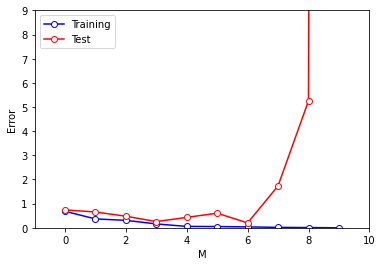

In [ ]:
for degree in range(10):
    poly, model = polynomial(degree)
    getTraninErrorAndTestError(degree, model)
x_plot = np.linspace(0, 9, 10)
plt.ylim(0 ,5)
plt.xlim(-1,10)
my_y_ticks = np.arange(0, 10.0, 1)
plt.yticks(my_y_ticks)
plt.plot(x_plot, train_error, label = "Training", c = 'b',marker='o', mec='b', mfc='w')
plt.plot(x_plot, test_error, label = "Test", c = 'r', marker='o', mec='r', mfc='w')
plt.ylabel('Error')
plt.xlabel('M')
plt.legend(loc='upper left')